# Machine Learning Classification with Python

Data yang digunakan adalah data customer yang ingin beli mobil, dengan mempertimbangkan gaji tahunan mereka. Data dapat diakses di [kaggle](https://www.kaggle.com/datasets/gabrielsantello/cars-purchase-decision-dataset).

Algoritma yang akan digunakan antara lain SVM, Decision Tree, dan Naive Bayes. Performa masing masing algoritma akan diukur di akhir notebook ini.

In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## Data Exploration dan Preprocessing

Setelah data dibaca ke memori, lakukan pembersihan data diantaranya handle missing value, perbaikan tipe data, normalisasi, dan transformasikan variabel kategorik

In [3]:
data_path = os.path.join('data', 'car_data.csv')
data = pd.read_csv(data_path)
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [4]:
# cek missing value
data.isna().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [5]:
# transformasi variabel kategorik (Gender)
gender_dummy = pd.get_dummies(data.Gender)
data = pd.concat([data.drop('Gender', axis=1), gender_dummy], axis=1)
data.head()

,User ID,Age,AnnualSalary,Purchased,Female,Male
0,385,35,20000,0,0,1
1,681,40,43500,0,0,1
2,353,49,74000,0,0,1
3,895,40,107500,1,0,1
4,661,25,79000,0,0,1


<AxesSubplot:>

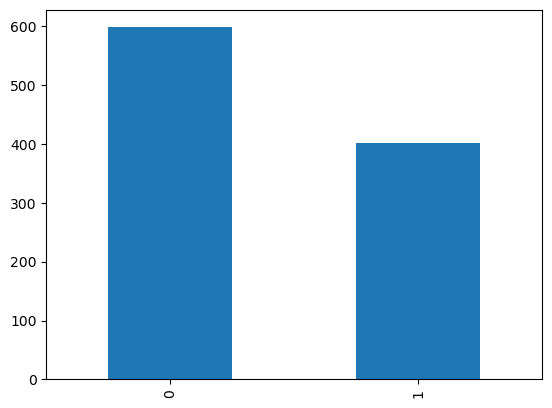

In [6]:
# cek data balance pada variabel target
data.Purchased.value_counts().plot(kind='bar')

## Build Model

Disini akan dibuat training set dan test set dengan test set sebesar 20% dan training 80%.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=['User ID', 'Purchased']),
    data.Purchased,
    test_size=0.2
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


### SVM

Untuk meningkatkan performa model, akan diterapkan standard scaler pada model ini. Sementara untuk model decision tree dan naive bayes tidak membutuhkan scaling.

In [9]:
clf_svm = make_pipeline(StandardScaler(), SVC(random_state=1))
clf_svm.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=1))])

### Decision Tree

In [11]:
clf_dt = DecisionTreeClassifier(random_state=1)
clf_dt = clf_dt.fit(X_train, y_train)

### Naive Bayes

In [13]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

## Evaluasi Model

Evaluasi model kasus klasifikasi menggunakan classification report yang berisi precision, recall, f1-score, dan accuracy.

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix

def eval_model(model):
    y_pred = model.predict(X_test)
    
    plot_confusion_matrix(model, X_test, y_test, cmap='GnBu')
    plt.show()
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Recall: %.3f' % recall_score(y_test, y_pred))
    print('F1: %.3f' % f1_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

SVM


f:\miniconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


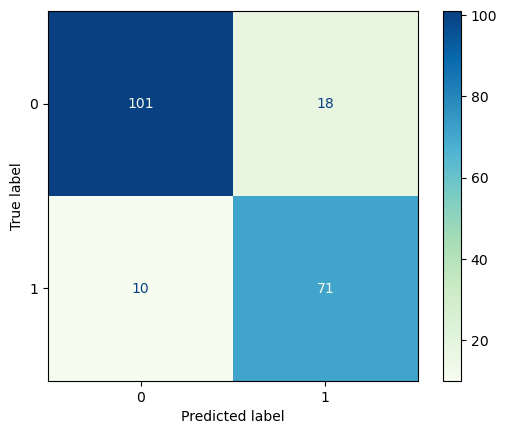

Precision: 0.798
Recall: 0.877
F1: 0.835
Accuracy: 0.860


In [16]:
print('SVM')
eval_model(clf_svm)

Decision Tree


f:\miniconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


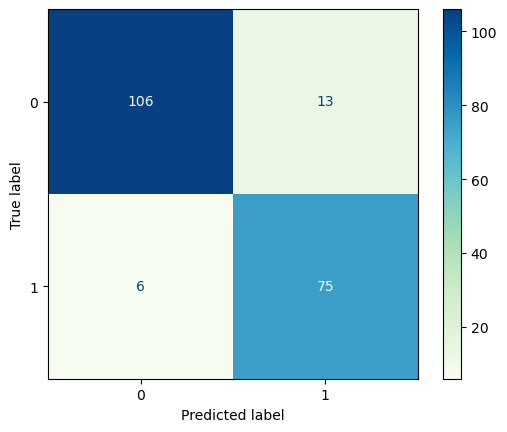

Precision: 0.852
Recall: 0.926
F1: 0.888
Accuracy: 0.905


In [17]:
print('Decision Tree')
eval_model(clf_dt)

Naive Bayes


f:\miniconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


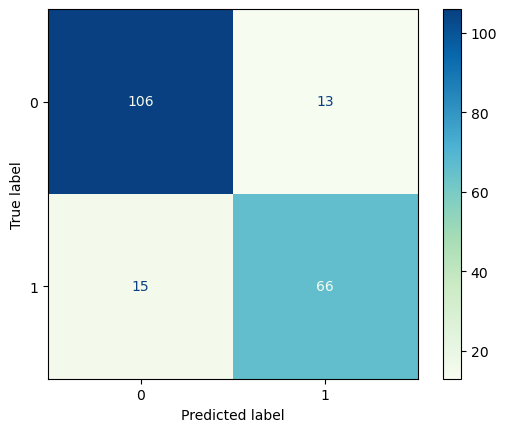

Precision: 0.835
Recall: 0.815
F1: 0.825
Accuracy: 0.860


In [18]:
print('Naive Bayes')
eval_model(gnb)

## Kesimpulan

Ketiga model diatas tentu saja masih dapat ditingkatkan performanya dengan algoritma terkait masing masing. Namun sebagai perbandingan inilah hasil precision, recall, F1-score, dan accuracy masing-masing model.

| Model | Precision | Recall | F1-Score | Accuracy |
| --- | --- | --- | --- | ---
| SVM | 0.798 | 0.877 | 0.835 | 0.860
| Decision Tree | 0.852 | 0.926 | 0.888 | 0.905
| Gaussian Naive Bayes | 0.835 | 0.815 | 0.825 | 0.860

Dapat dilihat pada tabel diatas, model Decision Tree lebih unggul untuk keempat metrik daripada model lainnya. Maka Decision Tree cocok untuk klasifikasi pada data ini.